In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
import pandas as pd
df = pd.read_csv('smsspamcollection.txt', sep='\t', header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
pip install -q --upgrade nltk spacy gensim wordcloud textblob contractions clean-text unicode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [10]:
import re
import string
import contractions
from textblob import TextBlob

def text_cleaning(mystr):
    mystr = mystr.lower()     # case folding
    mystr = re.sub('\w*\d\w*', '', mystr) # removing digits
    mystr = re.sub('\n', ' ', mystr)      # replace new line characters with space
    mystr = re.sub('[‘’“”…]', '', mystr) # removing double quotes and single quotes
    mystr = re.sub('<.*?>', '', mystr)   # removing html tags
    mystr = re.sub('https?://\S+|www.\.\S+', '', mystr) # removing URLs
    mystr = ''.join([c for c in mystr if c not in string.punctuation])  # remove punctuations
    mystr = ' '.join([contractions.fix(word) for word in mystr.split()]) # expand contractions
    return mystr

In [11]:
df['r_cleaned'] = df[1].apply(lambda x : text_cleaning(x))
df.head()

,0,1,r_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif you oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...


## Tokenization

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
df['r_tokenized'] = df['r_cleaned'].apply(lambda x: word_tokenize(x))
df.head()

,0,1,r_cleaned,r_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif you oni,"[ok, lar, joking, wif, you, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,"[you, dun, say, so, early, hor, you, c, alread..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he..."


## Remove stop words

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_text):
    new_words = [word for word in tokenized_text if word not in stop_words]
    return new_words

df['r_no_sw'] = df['r_tokenized'].apply(lambda token: remove_stopwords(token))
df.head()

,0,1,r_cleaned,r_tokenized,r_no_sw
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif you oni,"[ok, lar, joking, wif, you, oni]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,"[you, dun, say, so, early, hor, you, c, alread...","[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]"


In [19]:
# join the tokens of pre-processed text
df['processed_reviews'] = df['r_no_sw'].apply(lambda x: ' '.join(x))

new_df = pd.concat([df[0], df['processed_reviews']], axis=1)

# save the resulting datafrrame to a new csv file
new_df.to_csv('processed_imdb_reviews.csv', index=False)
new_df.head()

,0,processed_reviews
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though


In [24]:
new_df['target'] = new_df[0].map({'spam':1, 'ham': 0})
new_df

,0,processed_reviews,target
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif oni,0
2,spam,free entry wkly comp win fa cup final tkts may...,1
3,ham,dun say early hor c already say,0
4,ham,nah think goes usf lives around though,0
...,...,...,...
5567,spam,time tried contact £ pound prize claim easy ca...,1
5568,ham,ü b going esplanade fr home,0
5569,ham,pity mood soany suggestions,0
5570,ham,guy bitching acted like id interested buying s...,0


In [25]:
x = new_df.processed_reviews
x

0       go jurong point crazy available bugis n great ...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts may...
3                         dun say early hor c already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact £ pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: processed_reviews, Length: 5572, dtype: object

In [27]:
y = new_df.target
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [20]:
# Create an instance of TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
type(tfidf_vec)

sklearn.feature_extraction.text.TfidfVectorizer

In [28]:
# Create an instance of TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(x)

In [29]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
dtm = pd.DataFrame(data=tfidf.todense(), columns = tfidf_vec.get_feature_names_out())
dtm

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
tfidf.toarray().shape

(5572, 8138)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(tfidf.toarray(), y, test_size=0.2)

In [34]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
y_test

991     0
1153    0
806     0
1457    0
4549    0
       ..
2179    0
4212    0
4282    0
354     0
1906    0
Name: target, Length: 1115, dtype: int64

Confusion Matrix:
 [[955   0]
 [ 36 124]]


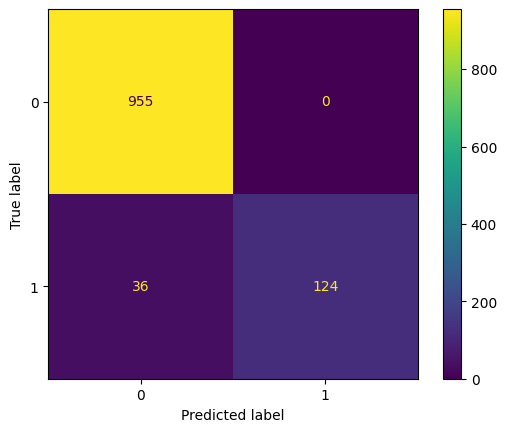

In [37]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [38]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)

Accuracy score:  0.967713004484305
Precision score:  1.0
Recall score:  0.775
F1 score:  0.8732394366197184
